# Парадокс двух конвертов

**Задача**. Есть два неразличимых конверта с деньгами. В одном находится сумма в два раза большая, чем во втором. Величина этой суммы неизвестна. Конверты дают двум игрокам. Каждый из них может открыть свой конверт и пересчитать в нём деньги. После этого игроки должны решить: стоит ли обменять свой конверт на чужой?

Оба игрока рассуждают следующим образом. Я вижу в своём конверте сумму $X$. В чужом конверте равновероятно может находиться $2X$ и $\frac{X}{2}$. Поэтому если я поменяю конверт, то у меня в среднем будет $\frac{2X+\frac{X}{2}}{2}=\frac{5}{4}X$, то есть больше, чем сейчас. Значит, обмен выгоден. Однако обмен не может быть выгоден обоим игрокам. Где в их рассуждениях кроется ошибка?

Обозначим сумму в конверте первого игрока через $S_1$, сумму в конверте второго игрока через $S_2$, а их отношение $n=\frac{S_1}{S_2}$. По условию задачи $n$ принимает значения $2$ и $\frac{1}{2}$ с вероятностями по $\frac{1}{2}$. Таким образом, мат. ожидание $M(n)=\frac{5}{4}$. То же самое можно сказать о распределении и мат. ожидании обратной величины $\frac{1}{n}=\frac{S_2}{S_1}$. О распределении СВ $S_1$ и $S_2$ нет никакой информации, кроме той, что их отношение $n$ распределено по описанному закону. 

Игроки наблюдают в своих конвертах результаты одного испытания над «своими» случайными величинами, но не знают этот результат для другого игрока и для отношения сумм в конвертах. Обозначим $g_1=S_2-S_1$ – выигрыш первого игрока (в случае обмена), и соответственно $g_2=S_1-S_2$ – выигрыш второго игрока. Тогда суммарный выигрыш $g_1+g_2=0$, и в частности $M(g_1)+M(g_2)=0$

 В то же время (если $n$ и $S_2$ не коррелируют):

$$ M(g_2)=M(S_1)-M(S_2)=M(n\cdot S_2)-M(S_2)=M(S_2)\cdot M(n)-M(S_2)=M(S_2)(M(n)-1)=\frac{1}{4}M(S_2) $$

Аналогично (если $\frac{1}{n}$ и $S_1$ не коррелируют):

$$ M(g_1)=M(S_2)-M(S_1)=M(\frac{S_1}{n})-M(S_1)=M(S_1)\cdot M(\frac{1}{n})-M(S_1)=M(S_1)(M(\frac{1}{n})-1)=\frac{1}{4}M(S_1) $$

В случае «наивного» восприятия игрок считает величину $n$ и «свою» величину ($S_1$ или $S_2$) независимыми, то есть, несмотря на испытание, полагает апостериорное распределение $n$ совпадающим с априорным. Возможно, один из них прав, тогда одно из равенств верно. Но оба равенства верны быть не могут, так как в этом случае получилось бы $M(g_1)+M(g_2)=\frac{1}{4}M(S_1)+\frac{1}{4}M(S_2)>0$.

Таким образом, возможно, что один из игроков прав, считая обмен выгодным для себя – например, это верно, если сумма в его конверте и отношение сумм в конвертах независимы. Но для обоих сразу это невозможно, так что противоречия нет.

Например.

Пусть $X$ – меньшая сумма, тогда возможны два исхода:
* игрок 1 получил $X$, игрок 2 – $2X$;
* игрок 1 получил $2X$, игрок 2 – $X$.

Если в реальности произошёл исход 1, то рассуждение игрока 1 может быть корректным.
Но тогда рассуждение игрока 2 "у другого может быть $4X$" – ложно, потому что $4X$ вообще не существует в задаче.

## Моделирование в Python

Средний выигрыш при обмене: 0.0079 (ожидается 0)
При A = 10: M = 20.00, 5/4*A = 12.50
При A = 20: M = 24.95, 5/4*A = 25.00
При A = 40: M = 50.23, 5/4*A = 50.00
При A = 80: M = 99.88, 5/4*A = 100.00
При A = 160: M = 80.00, 5/4*A = 200.00


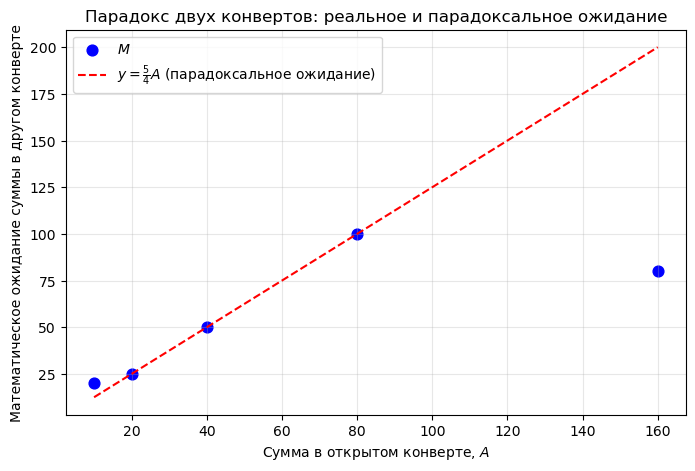

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# зададим возможные значения X (меньшая сумма)
X_values = np.array([10, 20, 40, 80])  
n_values = 100_000

A_list = []                                 # увиденная сумма A
gain_if_switch = []                         # сколько получим при обмене - ("минус") сколько было

for _ in range(n_values):
    X = np.random.choice(X_values)          # меньшая сумма
    envelopes = [X, 2 * X]                  # два конверта
    chosen = np.random.choice([0, 1])       # выбираем случайный
    A = envelopes[chosen]                   # сумма в выбранном
    other = envelopes[1 - chosen]           # сумма в другом
    
    A_list.append(A)
    gain_if_switch.append(other - A)        # если поменяем – изменение суммы

A_array = np.array(A_list)
gain_array = np.array(gain_if_switch)

avg_gain = gain_array.mean()                # средний выигрыш от обмена
print(f"Средний выигрыш при обмене: {avg_gain:.4f} (ожидается 0)")

unique_A = np.unique(A_array)
M = []
A_vals = []

for a in sorted(unique_A):
    mask = (A_array == a)                   # находим все индексы, где участник увидел сумму a
    # если есть хотя бы один случай, где A = a
    if np.sum(mask) > 0:
        M_other = gain_array[mask].mean() + a  
        M.append(M_other)
        A_vals.append(a)
        
        print(f"При A = {a}: M = {M_other:.2f}, 5/4*A = {1.25 * a:.2f}")

A_vals = np.array(A_vals)
M = np.array(M)

plt.figure(figsize=(8, 5))
plt.scatter(A_vals, M, color='blue', s=60, label=r'$M$')
plt.plot(A_vals, 1.25 * A_vals, 'r--', label=r'$y = \frac{5}{4}A$ (парадоксальное ожидание)')

plt.xlabel('Сумма в открытом конверте, $A$')
plt.ylabel('Математическое ожидание суммы в другом конверте')
plt.title('Парадокс двух конвертов: реальное и парадоксальное ожидание')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Таким образом, парадоксальное рассуждение $M=\frac{5}{4}A$ неверно, потому что оно предполагает, что при любом $A$ вероятности "в другом конверте сумма $2A$" и "в другом конверте сумма $\frac{A}{2}$" равны $\frac{1}{2}$ (на самом деле эти вероятности зависят от того, какие значения возможны). Математические ожидания не следуют линии $y=\frac{5}{4}x$.